<a href="https://colab.research.google.com/github/sunand-kumar/new/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
single_image.shape

(28, 28)

In [ ]:
single_image.max()

255

In [ ]:
single_image.min()

0

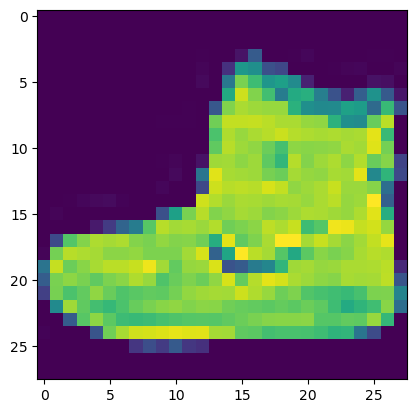

In [ ]:
plt.imshow(single_image)

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_test.shape

(10000,)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_cat_train.shape

(60000, 10)

In [ ]:
y_cat_test = to_categorical(y_test)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
#Normalize the data
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0].max()

1.0

In [ ]:
x_train[0].min()

0.0

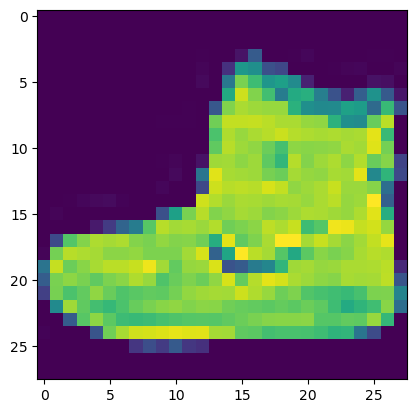

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#build the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'linear',input_shape=(28,28,1),padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [ ]:
#Train the model
model.fit(x_train, y_cat_train, batch_size= 64, epochs = 30, validation_data=(x_test, y_cat_test))

Epoch 1/30
938/938 [==============================] - 18s 19ms/step - loss: 0.4501 - accuracy: 0.8382 - val_loss: 0.3194 - val_accuracy: 0.8807
Epoch 2/30
938/938 [==============================] - 18s 19ms/step - loss: 0.2748 - accuracy: 0.9003 - val_loss: 0.2752 - val_accuracy: 0.9012
Epoch 3/30
938/938 [==============================] - 18s 19ms/step - loss: 0.2319 - accuracy: 0.9147 - val_loss: 0.2900 - val_accuracy: 0.8917
Epoch 4/30
938/938 [==============================] - 18s 19ms/step - loss: 0.2049 - accuracy: 0.9246 - val_loss: 0.2383 - val_accuracy: 0.9113
Epoch 5/30
938/938 [==============================] - 18s 19ms/step - loss: 0.1769 - accuracy: 0.9341 - val_loss: 0.2485 - val_accuracy: 0.9074
Epoch 6/30
938/938 [==============================] - 19s 20ms/step - loss: 0.1564 - accuracy: 0.9414 - val_loss: 0.2337 - val_accuracy: 0.9173
Epoch 7/30
938/938 [==============================] - 19s 20ms/step - loss: 0.1372 - accuracy: 0.9488 - val_loss: 0.2382 - val_accuracy:

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.450110,0.838200,0.319350,0.8807
1,0.274844,0.900300,0.275157,0.9012
2,0.231901,0.914750,0.289991,0.8917
3,0.204942,0.924617,0.238320,0.9113
4,0.176927,0.934133,0.248494,0.9074
5,0.156450,0.941417,0.233688,0.9173
6,0.137176,0.948783,0.238172,0.9177
7,0.117429,0.956467,0.260696,0.9192
8,0.102793,0.960933,0.247727,0.9192
9,0.087373,0.966633,0.270806,0.9205


<Axes: >

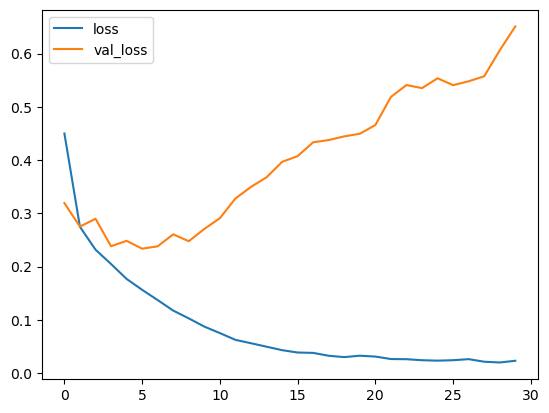

In [ ]:
losses[['loss','val_loss']].plot()

<Axes: >

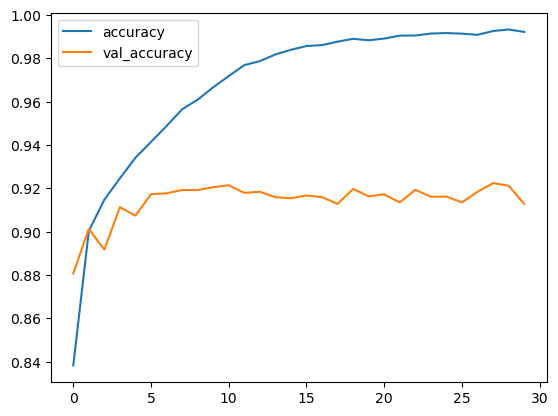

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',patience = 5)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'linear',input_shape=(28,28,1),padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.1))
model.add(Dropout(0.3))
model.add(Dense(10,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [ ]:
#Train the model
model.fit(x_train, y_cat_train, batch_size= 64, epochs = 30, validation_data=(x_test, y_cat_test),callbacks=[early_stop])

Epoch 1/30
938/938 [==============================] - 21s 22ms/step - loss: 0.5723 - accuracy: 0.7874 - val_loss: 0.3717 - val_accuracy: 0.8620
Epoch 2/30
938/938 [==============================] - 21s 22ms/step - loss: 0.3676 - accuracy: 0.8643 - val_loss: 0.3099 - val_accuracy: 0.8842
Epoch 3/30
938/938 [==============================] - 21s 23ms/step - loss: 0.3221 - accuracy: 0.8812 - val_loss: 0.2763 - val_accuracy: 0.8991
Epoch 4/30
938/938 [==============================] - 2058s 2s/step - loss: 0.2958 - accuracy: 0.8911 - val_loss: 0.2755 - val_accuracy: 0.8985
Epoch 5/30
938/938 [==============================] - 2032s 2s/step - loss: 0.2784 - accuracy: 0.8958 - val_loss: 0.2588 - val_accuracy: 0.9050
Epoch 6/30
938/938 [==============================] - 3169s 3s/step - loss: 0.2647 - accuracy: 0.9039 - val_loss: 0.2463 - val_accuracy: 0.9078
Epoch 7/30
938/938 [==============================] - 1914s 2s/step - loss: 0.2506 - accuracy: 0.9070 - val_loss: 0.2327 - val_accuracy:

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.572317,0.787383,0.371726,0.8620
1,0.367589,0.864283,0.309925,0.8842
2,0.322149,0.881167,0.276296,0.8991
3,0.295839,0.891100,0.275506,0.8985
4,0.278442,0.895767,0.258809,0.9050
5,0.264704,0.903917,0.246340,0.9078
6,0.250632,0.907017,0.232685,0.9098
7,0.247364,0.907483,0.241892,0.9110
8,0.241340,0.910350,0.229168,0.9148
9,0.234309,0.912967,0.223935,0.9165


<Axes: >

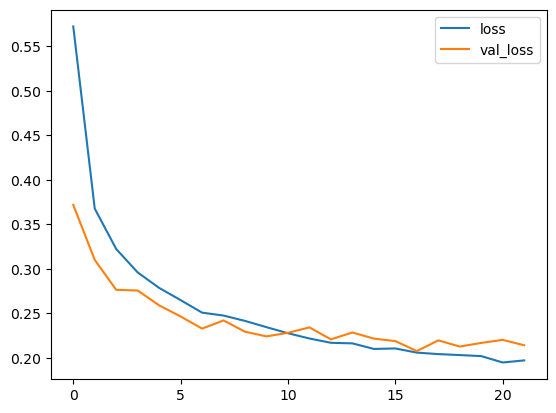

In [ ]:
losses[['loss','val_loss']].plot()

<Axes: >

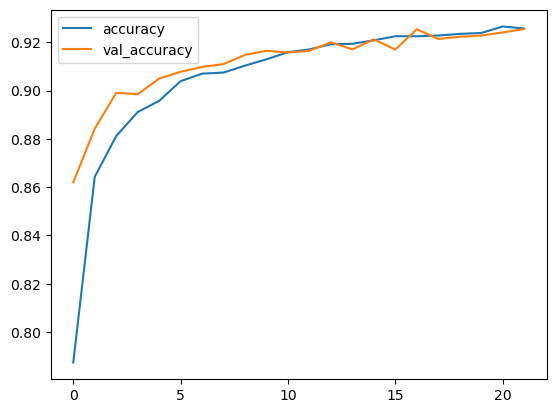

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2140 - accuracy: 0.9255


[0.21396443247795105, 0.9254999756813049]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_test_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_test_pred.shape

(10000, 10)

In [ ]:
y_test_pred[0]

array([4.6006239e-15, 2.5482941e-13, 2.9472803e-16, 2.5962483e-15,
       3.0985859e-18, 4.7159281e-07, 5.4073525e-15, 6.4077016e-05,
       1.2929713e-15, 9.9993539e-01], dtype=float32)

In [ ]:
y_test_pred_classes = np.argmax(y_test_pred,axis = 1)

In [ ]:
y_test_pred_classes.shape

(10000,)

In [ ]:
y_test_pred_classes[0]

9

In [ ]:
print(classification_report(y_test,y_test_pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       1.00      0.99      0.99      1000
           2       0.91      0.85      0.88      1000
           3       0.90      0.95      0.93      1000
           4       0.87      0.89      0.88      1000
           5       0.99      0.99      0.99      1000
           6       0.78      0.77      0.77      1000
           7       0.95      0.99      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
confusion_matrix(y_test, y_test_pred_classes)

array([[899,   0,   9,  19,   4,   1,  64,   0,   4,   0],
       [  0, 987,   0,  11,   2,   0,   0,   0,   0,   0],
       [ 17,   0, 850,   8,  59,   0,  66,   0,   0,   0],
       [  6,   4,   5, 952,  17,   0,  16,   0,   0,   0],
       [  0,   0,  21,  28, 887,   0,  64,   0,   0,   0],
       [  0,   0,   0,   0,   0, 988,   0,   9,   0,   3],
       [101,   0,  43,  35,  49,   0, 768,   0,   4,   0],
       [  0,   0,   0,   0,   0,   4,   0, 988,   0,   8],
       [  4,   0,   1,   3,   3,   1,   3,   1, 984,   0],
       [  0,   0,   0,   0,   0,   2,   1,  45,   0, 952]])

In [ ]:
y_train_pred = model.predict(x_train)

1875/1875 [==============================] - 984s 525ms/step


In [ ]:
y_train_pred.shape

(60000, 10)

In [ ]:
y_train_pred[0]

array([1.8494325e-16, 3.8695078e-13, 3.3861796e-17, 7.1308570e-15,
       8.9105023e-19, 6.7677327e-08, 3.4332532e-16, 7.9222899e-03,
       3.2164842e-15, 9.9207765e-01], dtype=float32)

In [ ]:
y_train_pred_classes = np.argmax(y_train_pred,axis = 1)

In [ ]:
y_train_pred_classes.shape

(60000,)

In [ ]:
y_train_pred_classes[0]

9

In [ ]:
print(classification_report(y_train,y_train_pred_classes))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6000
           1       1.00      1.00      1.00      6000
           2       0.96      0.88      0.92      6000
           3       0.94      0.98      0.96      6000
           4       0.90      0.92      0.91      6000
           5       1.00      1.00      1.00      6000
           6       0.87      0.87      0.87      6000
           7       0.97      1.00      0.98      6000
           8       1.00      1.00      1.00      6000
           9       0.99      0.97      0.98      6000

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000



In [ ]:
confusion_matrix(y_train,y_train_pred_classes)

array([[5603,    1,   34,  110,    4,    0,  246,    0,    2,    0],
       [   0, 5989,    0,   11,    0,    0,    0,    0,    0,    0],
       [  73,    1, 5272,   44,  395,    0,  215,    0,    0,    0],
       [  14,    2,    3, 5877,   78,    0,   26,    0,    0,    0],
       [   2,    3,   65,  118, 5542,    0,  270,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5974,    0,   20,    0,    6],
       [ 421,    2,  141,  107,  133,    0, 5195,    0,    1,    0],
       [   0,    0,    0,    0,    0,    2,    0, 5974,    0,   24],
       [   2,    0,    0,    4,    8,    0,    8,    1, 5977,    0],
       [   0,    0,    0,    0,    0,    3,    0,  174,    0, 5823]])

In [ ]:
#predict for inference image
inference_image = x_test[234]

In [ ]:
print(inference_image.max(),inference_image.min())

1.0 0.0


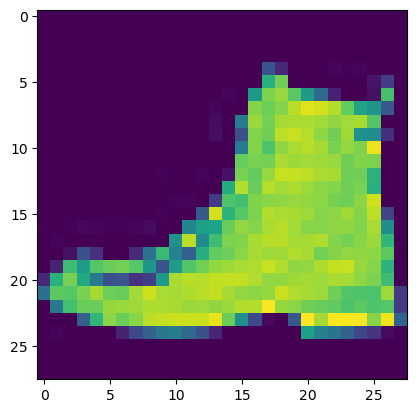

In [ ]:
plt.imshow(inference_image)

In [ ]:
inference_image.shape

(28, 28, 1)

In [ ]:
np.argmax(model.predict(inference_image.reshape(1,28,28,1)))

1/1 [==============================] - 0s 42ms/step


9